# 1. Общая информация и первый взгляд на данные

Будем анализировать датасет с продажами компьютерных игр на интернет-площадке

---
Описание данных

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

In [4]:
data = pd.read_csv('games.csv')

In [5]:
# Выводим первые 5 строк датасета
data.head(5)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [6]:
# Общая информация
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В датасете 16715 записей. 11 колонок, 6 из которых имеют численный тип данных. В датасете наблюдаются пропуски:
* немногочисленные в столбцах `Name`, `Year_of_Release`, `Genre`
* многочисленные в столбцах `Critic_Score`, `User_Score`, `Rating`


In [8]:
# Основные описательные статистики для числовых переменных
data.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Из основных описательных статистик можно подчеркнуть, что в датасет попали игры с 1980 по 2016 года.

Минимальное количество продаж в каждом регионе может быть нулем. Это может означать, что игра не продавалась или же имеет место быть ошибка в данных. В дальнейшем изучим это более детально

В столбце `Critic_Score` оценки критиков варируются от 13.9 до 98. Значение не целое, что странно, ведь шкала 100 бальная и нет смысла выделять доли оценок. Изучим детальнее. Также в жтом столбце достаточно много пропусков, что может говорить о том, что не для всех игр есть оценка от критиков.

In [10]:
# Основные опистельные статистики категориальных переменных
data.describe(include='object')

,Name,Platform,Genre,User_Score,Rating
count,16713,16715,16713,10014,9949
unique,11559,31,12,96,8
top,Need for Speed: Most Wanted,PS2,Action,tbd,E
freq,12,2161,3369,2424,3990


Про категориальные переменные можно сказать следущее:

1. пропуски в столбце `Rating` свидетельствуют могут свидетельствоавать о том, что игре еще не присвоен рейтинг
2. unique показывает количество униакальных значений для столбцов. Меньшее количество уникальных значений в столбце `name` может говорить о том, что в датасете возможно есть игры с одинаковым названием.
3. Также собрана статистика по 31 платформе и 12 жанрам
4. Можно увидеть самые часто встречаемые значения в сточке `top`. В столбце `User_Score` присутвует не совсем понятное значение `tbd`. При обработке данных стоит обязательно на это обратить внимание

# 2. Предобработка данных

## 2.1 Переведем названия всех столбцов к нижнему регистру для единого стиля

In [14]:
data.columns = data.columns.str.lower()
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

## 2.2 Обработка пропусков и аномальных значений

In [16]:
# Выводим количество пропусков в каждом столбце
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

### 2.2.1 Пропуски в `name`

In [18]:
# вывод игр без названия
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


видим две игры без названия с датаой релиза 1993 года. У этих игр также отсутствуют значения в столбцах с оценками критиков, оценками игроков и рейтингом. Продажи также не велики. Удалим эти данные

In [20]:
data = data[data['name'].notna()]

### 2.2.2 Пропуски в `year_of_release`

В данном столбце 269 пропусков. На самом деле при просмотре таблицы с записями, для которых не указана дата релиза было обнаружено, что в некоторых играх года выпуска пишут в названии. Однако таких игр относительно немного, да и в принципе числов 2004 в названии игры вполне может означать и не год. Можно оставить пропуски как есть, а можно избавиться от записей без указания года. Воспользуемся вторым вариантом

In [22]:
data[data['year_of_release'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.00,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
678,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.00,0.21,78.0,6.6,E10+
719,Call of Duty 3,Wii,NaN,Shooter,1.17,0.84,0.00,0.23,69.0,6.7,T
805,Rock Band,Wii,NaN,Misc,1.33,0.56,0.00,0.20,80.0,6.3,T


In [23]:
data = data[data['year_of_release'].notna()]

In [24]:
# Переводим год в целочисленный тип данных
data['year_of_release'] = data['year_of_release'].astype(int)

### 2.2.3 Пропуски в `rating` в принципе

In [26]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Заменим все рэйтинги **"K-A"** на **"E"** так как, это устаревшее маркировка

In [28]:
data.loc[data['rating'] == 'K-A', 'rating'] = 'E'

Пропуски в этом поле заменим на **Unknown**

In [30]:
data['rating'] = data['rating'].fillna('unknown')
data['rating'].value_counts()

rating
unknown    6676
E          3924
T          2905
M          1536
E10+       1393
EC            8
AO            1
RP            1
Name: count, dtype: int64

### 2.2.4 Обработка столбца `user_score`

Вообще переменная `user_score` - оценка пользователей игры, должна быть числовой. Однако встречаются значения **tbd**, которые переводят эту переменную в тип `object`. Аббревиатура **tbd** означает **to be determined** или **будет определено**. Соответственно логичнее всего эти значения заполнить пропусками, так как оценки для игры еще нет.

In [33]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = np.nan

In [34]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

Сразу переведем эту переменную в числовой тип.

In [36]:
data['user_score'] = pd.to_numeric(data['user_score'])

In [37]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
dtype: int64

Также для дальнейщей работы можно умножить столбец `user_score` на 10, чтобы перевести оценку игр пользователями из диапозона от 0 до 10 в диапозон от 0 до 100. Так мы получим одну размерность пользавтельской оценки и оценки критиков. На рапределение это никак не повлияет и данные не испортит

In [39]:
data['user_score'] = data['user_score'] * 10

# 3 Исследовательский анализ данных

## 3.1 Добавим столбец с суммарными продажаи по всем регионам

In [42]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
data.sample(5)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
4501,The Powerpuff Girls: Him and Seek,GBA,2002,Platform,0.31,0.11,0.00,0.01,NaN,NaN,unknown,0.43
12816,Diva Girls: Divas on Ice,DS,2009,Sports,0.05,0.00,0.00,0.00,NaN,NaN,E,0.05
14257,JoJo's Bizarre Adventure: Eyes of Heaven,PS4,2015,Fighting,0.00,0.00,0.03,0.00,61.0,74.0,T,0.03
16674,Tsukigime Ranko's Longest Day,PS3,2014,Action,0.00,0.01,0.00,0.00,NaN,NaN,unknown,0.01
8812,Tokyo Xanadu,PSV,2015,Role-Playing,0.00,0.00,0.15,0.00,NaN,NaN,unknown,0.15


## 3.2 Сколько игр выпускалось по годам

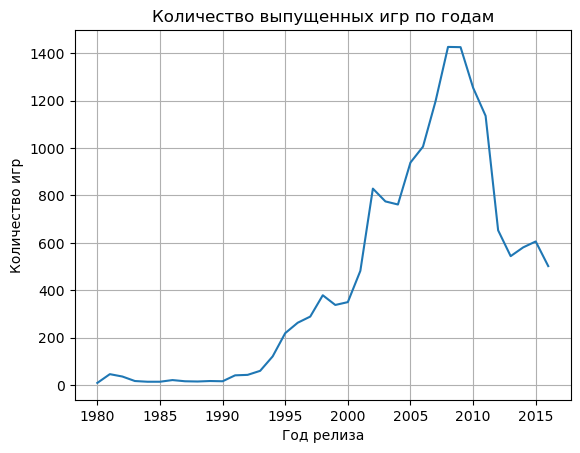

In [44]:
(data
 .groupby(by='year_of_release')['year_of_release']
 .count()
 .plot(grid=True)
)

plt.title('Количество выпущенных игр по годам')
plt.xlabel('Год релиза')
plt.ylabel('Количество игр')
plt.show()

Видим, что с 1980 количество выпускаемых игр увеличивалось вплоть до 2008-2009 года на который пришлось пик (более 1400 релизов). Далее наблюдается спад до 2016 года, с небольшим промежуточным ростом с 2014 по 2015.

## 3.3 Продажи по платформам

In [47]:
# млн проданных копий за все время по платформам
(data
 .groupby('platform')['total_sales']
 .sum()
 .sort_values(ascending=False)
)

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
PS       727.58
PS4      314.14
GBA      312.88
PSP      289.53
3DS      257.81
PC       255.76
GB       254.43
XB       251.57
NES      251.05
N64      218.01
SNES     200.04
GC       196.73
XOne     159.32
2600      86.48
WiiU      82.19
PSV       53.81
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

Построим графики показывающие продажи игр по топ 20 платформам в зависисмости от года.

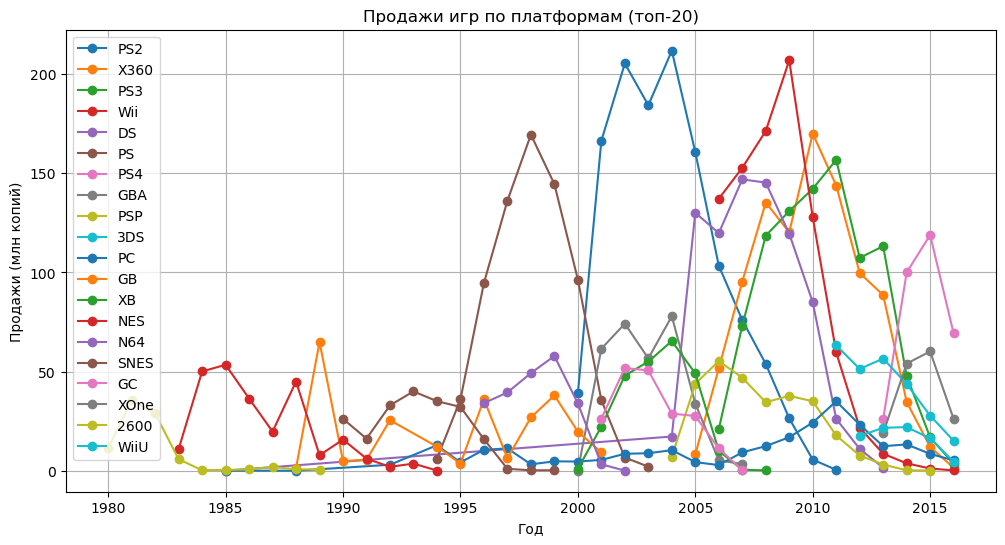

PS2: 11 лет (от 2000 до 2011)
X360: 11 лет (от 2005 до 2016)
PS3: 10 лет (от 2006 до 2016)
Wii: 10 лет (от 2006 до 2016)
DS: 28 лет (от 1985 до 2013)
PS: 9 лет (от 1994 до 2003)
PS4: 3 лет (от 2013 до 2016)
GBA: 7 лет (от 2000 до 2007)
PSP: 11 лет (от 2004 до 2015)
3DS: 5 лет (от 2011 до 2016)
PC: 31 лет (от 1985 до 2016)
GB: 13 лет (от 1988 до 2001)
XB: 8 лет (от 2000 до 2008)
NES: 11 лет (от 1983 до 1994)
N64: 6 лет (от 1996 до 2002)
SNES: 9 лет (от 1990 до 1999)
GC: 6 лет (от 2001 до 2007)
XOne: 3 лет (от 2013 до 2016)
2600: 9 лет (от 1980 до 1989)
WiiU: 4 лет (от 2012 до 2016)

Средний срок жизни платформы: 10.2 лет


In [49]:
top_platforms = (data
                 .groupby('platform')['total_sales']
                 .sum()
                 .nlargest(20)
                 .index
                 .tolist())

df_top = data[data['platform'].isin(top_platforms)]

# 3. Визуализация продаж по годам
plt.figure(figsize=(12, 6))
for platform in top_platforms:
    platform_data = df_top[df_top['platform'] == platform]
    sales_by_year = platform_data.groupby('year_of_release')['total_sales'].sum()
    plt.plot(sales_by_year.index, sales_by_year.values, label=platform, marker='o')

plt.title('Продажи игр по платформам (топ-20)')
plt.xlabel('Год')
plt.ylabel('Продажи (млн копий)')
plt.legend()
plt.grid()
plt.show()

# 4. Срок жизни платформ
platform_lifespan = []
for platform in top_platforms:
    years = data[data['platform'] == platform]['year_of_release']
    lifespan = years.max() - years.min()
    platform_lifespan.append(lifespan)
    print(f"{platform}: {lifespan} лет (от {years.min()} до {years.max()})")

avg_lifespan = sum(platform_lifespan) / len(platform_lifespan)
print(f"\nСредний срок жизни платформы: {avg_lifespan:.1f} лет")

Видно, что средний срок жизни платформы составляет 10 лет. Из графика видно, что популярность некоторых платформ приходилось на определенный переиод времени. Так с 1983 до середени 90х была популярна NES. В какой-то момент в 1993 на рынок ворвался первая приставка PS достигла небывалых обьемов продаж в 160 млн копий по всему миру к 1997 году и затем пошла на спад, так как на смену ей пришла PS2 с такими же рекордными продажами уже в 2001-2004 годах. За последнии 3 года многие платформы показывают спад в обьемах продаж, что может быть связано в целом в кризизом в игровой индустрии, а не с платформами по отдельности. Можно отдельно выделить новые платформы: `PS4`, `XOne`, `WiiU`, которые только появились на рынке и активно его завоевывают

 ## 3.4 Актуальный период

 Для дальнейшего анализа выделим актуальный период с 2014 по 2016 год. Нет смысла брать более ранние данные, так как модем зацепить давно ушедшие тренды. За последнии 2 года проанализируем популярность различныз платформ, обьемы проодаж по этим платформам. Выделим новых лидеров и аутсайдеров. Составим некую актуальную картину в игровой индустрии.

In [52]:
data_new = data[data['year_of_release'] >= 2014]

In [53]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1689 entries, 31 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             1689 non-null   object 
 1   platform         1689 non-null   object 
 2   year_of_release  1689 non-null   int32  
 3   genre            1689 non-null   object 
 4   na_sales         1689 non-null   float64
 5   eu_sales         1689 non-null   float64
 6   jp_sales         1689 non-null   float64
 7   other_sales      1689 non-null   float64
 8   critic_score     718 non-null    float64
 9   user_score       888 non-null    float64
 10  rating           1689 non-null   object 
 11  total_sales      1689 non-null   float64
dtypes: float64(7), int32(1), object(4)
memory usage: 164.9+ KB


В получившемся датасете осталось 1689 записей, что является 10% от исходного датасета. Как видно, в исходном датасете большинство игр было выпущено до 2014 года.

In [55]:
print(f'Количество платформ исходного датасета - {data["platform"].nunique()}')
print(f'Количество платформ после среза - {data_new["platform"].nunique()}')

Количество платформ исходного датасета - 31
Количество платформ после среза - 10


Видим, что достаточно много платформ осталось в истории игровой индустрии и естественным образом осталось 10 самых популярных платформ. Покажем на графике обьемы их продаж

In [57]:
data_grouped_platform = (data_new
 .pivot_table(index='platform', values='total_sales', aggfunc=['sum', 'count'])
 )

data_grouped_platform.columns = ['sum', 'count']

data_grouped_platform = (data_grouped_platform
                         .sort_values(by=['sum', 'count'],
                                      ascending=[True, True]))
data_grouped_platform

,sum,count
platform,,
PSP,0.36,13
Wii,5.07,11
PSV,22.40,295
PC,27.05,151
WiiU,42.98,73
X360,48.22,111
PS3,68.18,219
3DS,86.68,212
XOne,140.36,228


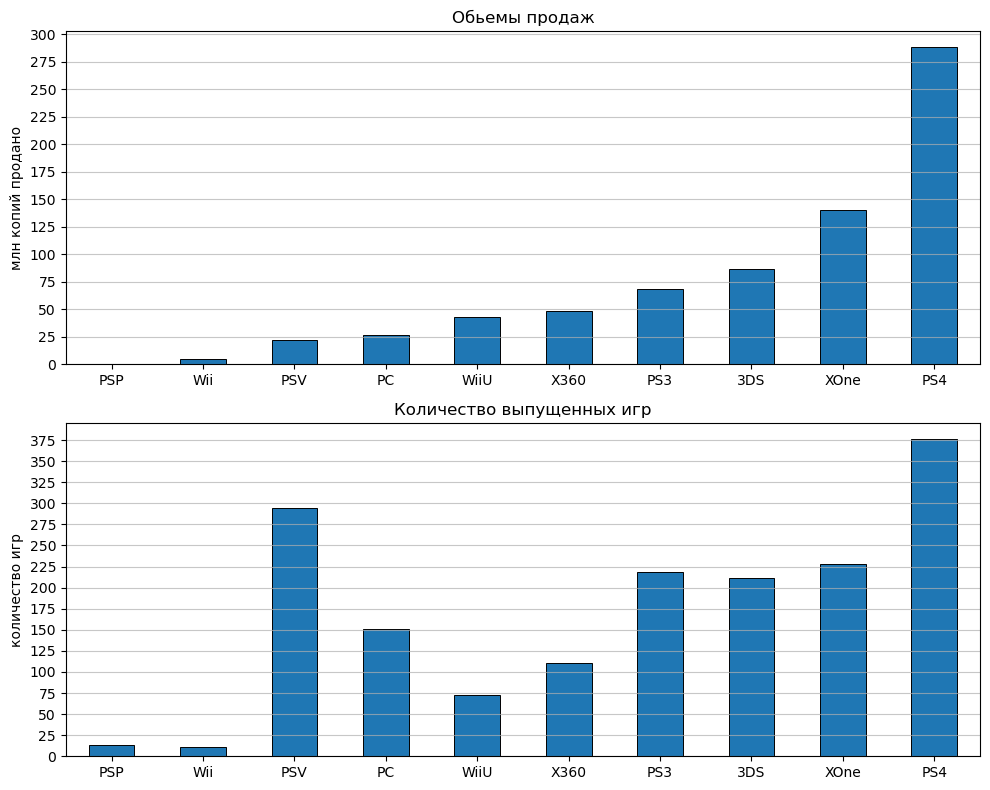

In [58]:
# создаем фигуры и две оси на которых буду распологаться графики
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# График для 'sum'
data_grouped_platform['sum'].plot(kind='bar', edgecolor='black', linewidth=0.7, ax=ax1)
ax1.set_title('Обьемы продаж')
ax1.set_ylabel('млн копий продано')
ax1.tick_params(axis='x', rotation=0)
ax1.set_xlabel('')
ax1.grid(axis='y', alpha=0.7)
ax1.set_yticks(range(0, 325, 25))

# График для 'count'
data_grouped_platform['count'].plot(kind='bar', edgecolor='black', linewidth=0.7, ax=ax2)
ax2.set_title('Количество выпущенных игр')
ax2.set_ylabel('количество игр')
ax2.tick_params(axis='x', rotation=0)
ax2.set_xlabel('')
ax2.grid(axis='y', alpha=0.7)
ax2.set_yticks(range(0, 400, 25))

# Отображение графиков
plt.tight_layout()
plt.show()

За последнии 2 года выделяется `PS4` - более 275 млн копий по всему миру и более 375 игр. Почти в 2 раза меньше обьемы продаж и количество игр у следующей по популярности платормы - `XOne`. На третьей позиции платформа `3DS` - около 80 млн обьем прожад и более 200 игр. Совсем непопулярные плтформы - `PSP` и `Wii`. У них меньше 10 млн проданных копий по всему миру и менее 20 выпущенных игр за последнии два года. Отдельно хочется сказать про платформы `PSV`, `PC`. При условии, что количество выпускаемых игр большое на этих платформах, обьмы продаж далеко не такие впечатляющие. Можно предположить, что для этих платформ выходило много не сильно популярных игр или же инди-игр, которые продавались маленькими тиражами.

Построим диаграммы размаха обьемов продаж по платформам

C:\Users\NikiTolLa\AppData\Local\Temp\ipykernel_8696\2278925601.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


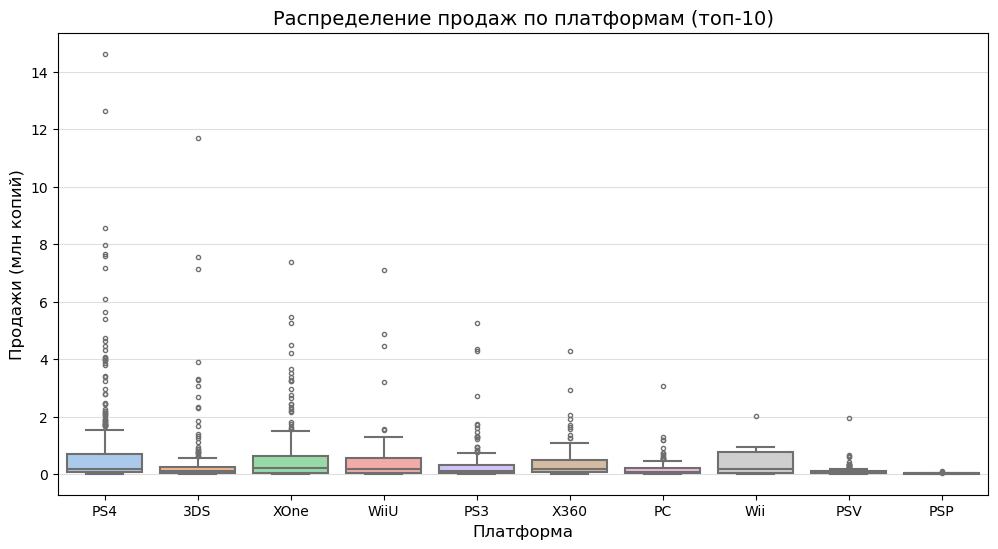

In [61]:
plt.figure(figsize=(12, 6))  # Размер фигуры
sns.boxplot(
    data=data_new,
    x='platform',
    y='total_sales',
    palette='pastel', # Цветовая схема
    order=data_new['platform'].unique(), # Порядок платформ
    linewidth=1.5,      # Толщина линий
    fliersize=3         # Размер выбросов
)

# Настройки оформления
plt.title('Распределение продаж по платформам (топ-10)', fontsize=14, )
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Продажи (млн копий)', fontsize=12)
plt.xticks(rotation=0)  # Поворот подписей платформ
plt.grid(axis='y', alpha=0.4)
plt.show()

На данном графике диаграмм размаха обьемов продаж по платформам можно отчетливо видеть выбросы. Эти выбросы ни в коем случае нельзя исключать, так как это игры с которые принесли наибольшую выручку. Видим, что для платформ `PS4`, `XOne`, `3DS` выбросов больше, чем для других платформ. Построим те же графики, только в другом масшатебе (до 2 млн копий), чтобы получше разглядеть квантили.

C:\Users\NikiTolLa\AppData\Local\Temp\ipykernel_8696\2536403605.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


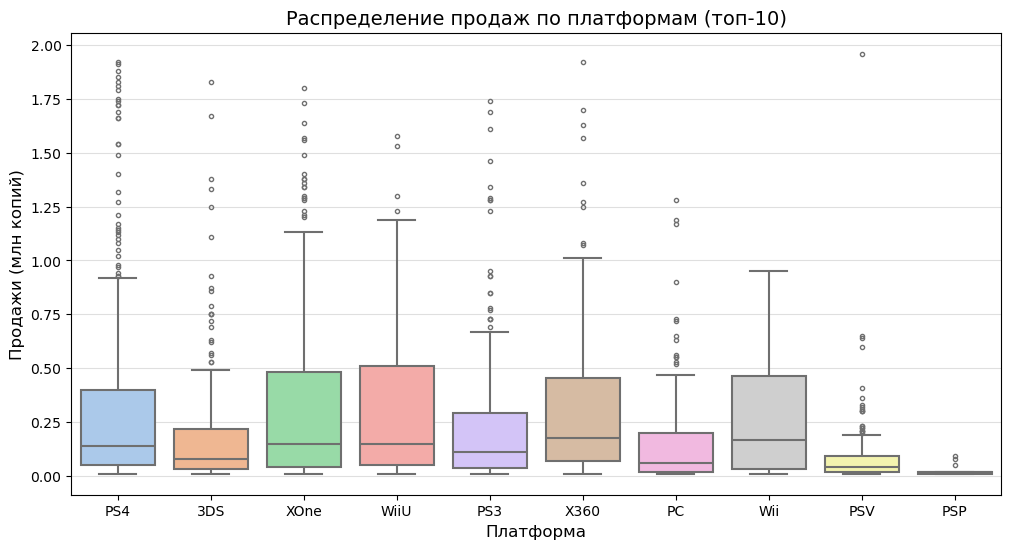

In [63]:
plt.figure(figsize=(12, 6))  # Размер фигуры
sns.boxplot(
    data=data_new[data_new['total_sales'] <= 2],
    x='platform',
    y='total_sales',
    palette='pastel',  # Цветовая схема
    order=data_new['platform'].unique(), # Порядок платформ
    linewidth=1.5,      # Толщина линий
    fliersize=3         # Размер выбросов
)

# Настройки оформления
plt.title('Распределение продаж по платформам (топ-10)', fontsize=14, )
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Продажи (млн копий)', fontsize=12)
plt.xticks(rotation=0)  # Поворот подписей платформ
plt.grid(axis='y', alpha=0.4)
plt.show()

И данного графика отметим следущее
* По каждой платформе медиана проданных копий примерно на уровне в 0.2 млн копий
* У всех платформ (кроме `WiiU`) 3й квартиль не превыщает 0.5 млн проданных копий.

интересно заметить, что для `3DS` межквартильный размах меньше, чем у многих платформ. 75% игр этой платформы продаются тиражами до 0.25 млн копий. Однако у этой платформы достаточно много выбросов или же сверхпопулярных игр, проданных огромными тиражами из-за чего данная платформа и стоит на 3ем месте по обьемам продаж выше.

## 3.5 Влияние оценок критиков и пользователей на обьемы продаж.

Посмотрим, как влияют оценки критиков и пользователей на обьемы продаж для `PS4`

In [66]:
ps4 = data_new[data_new['platform'] == 'PS4']

In [67]:
ps4 [['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.402661,-0.040132
critic_score,0.402661,1.000000,0.546434
user_score,-0.040132,0.546434,1.000000


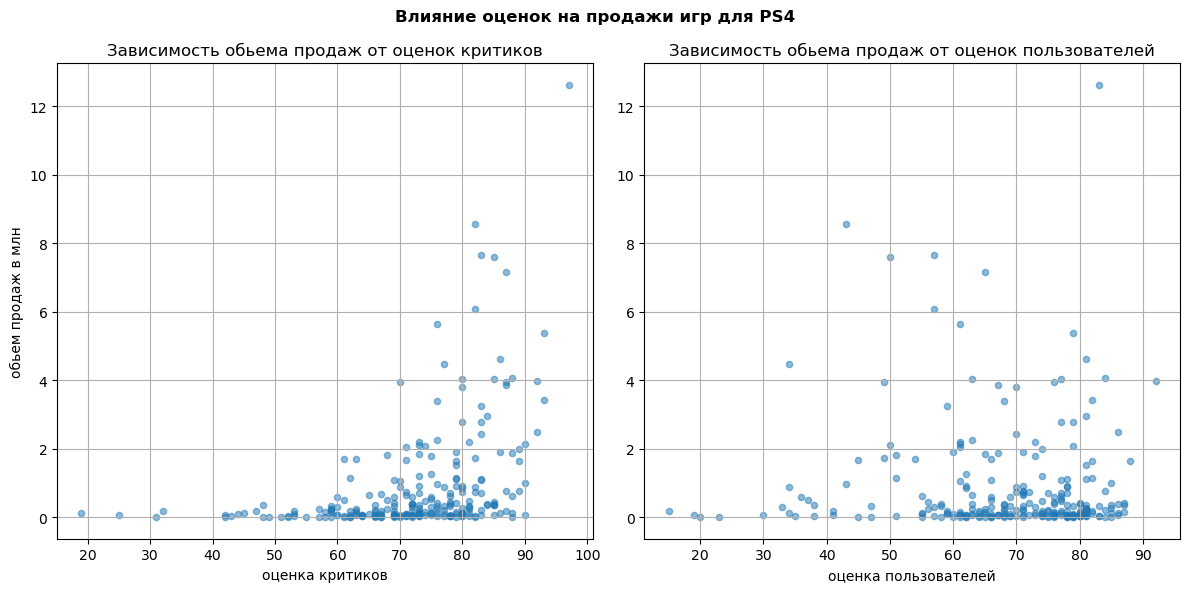

In [68]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

fig.suptitle('Влияние оценок на продажи игр для PS4', fontweight='bold')
ps4.plot(kind='scatter', x='critic_score', y='total_sales', grid=True, alpha=0.5, ax=ax1)
ax1.set_title('Зависимость обьема продаж от оценок критиков')
ax1.set_xlabel('оценка критиков')
ax1.set_ylabel('обьем продаж в млн')

ps4.plot(kind='scatter', x='user_score', y='total_sales', grid=True, alpha=0.5, ax=ax2)
ax2.set_title('Зависимость обьема продаж от оценок пользователей')
ax2.set_xlabel('оценка пользователей')
ax2.set_ylabel('')

plt.tight_layout()
plt.show()

Из графиков видим, что большинство игр продаются тиражом до 2 млн копий с оценками от 60 до 90 для критиков и 55-85 для пользователей. Также наблюдается положительная кореляция между оценками критиков и обьемом продаж. Однако наблюдается отрицательная корреляция между оценками пользователей и обьемом продаж, но она совсем небольшая. Получается при более высоких оценках пользователей, обьемы продаж уменьшаются. Посмотрим аналогичные графики для платформ `XOne` и `3DS`

In [70]:
XOne = data_new[data_new['platform'] == 'XOne']
XOne[['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.428677,-0.070384
critic_score,0.428677,1.000000,0.440977
user_score,-0.070384,0.440977,1.000000


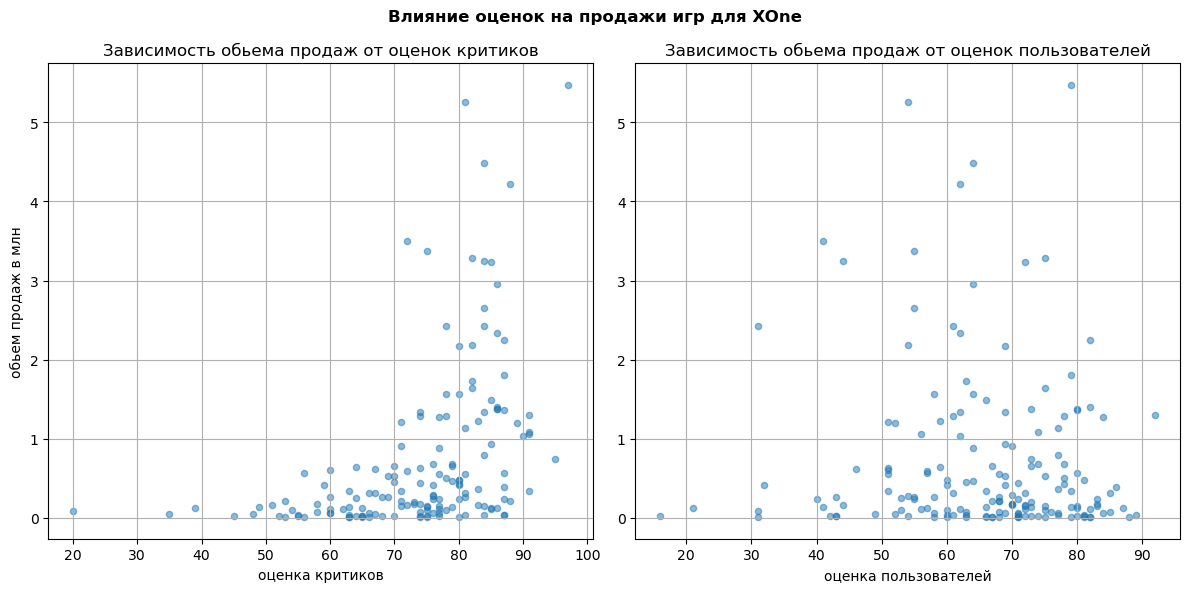

In [71]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

fig.suptitle('Влияние оценок на продажи игр для XOne', fontweight='bold')
XOne.plot(kind='scatter', x='critic_score', y='total_sales', grid=True, alpha=0.5, ax=ax1)
ax1.set_title('Зависимость обьема продаж от оценок критиков')
ax1.set_xlabel('оценка критиков')
ax1.set_ylabel('обьем продаж в млн')

XOne.plot(kind='scatter', x='user_score', y='total_sales', grid=True, alpha=0.5, ax=ax2)
ax2.set_title('Зависимость обьема продаж от оценок пользователей')
ax2.set_xlabel('оценка пользователей')
ax2.set_ylabel('')

plt.tight_layout()
plt.show()

In [72]:
three_ds = data_new[data_new['platform'] == '3DS']
three_ds[['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.314117,0.215193
critic_score,0.314117,1.000000,0.862485
user_score,0.215193,0.862485,1.000000


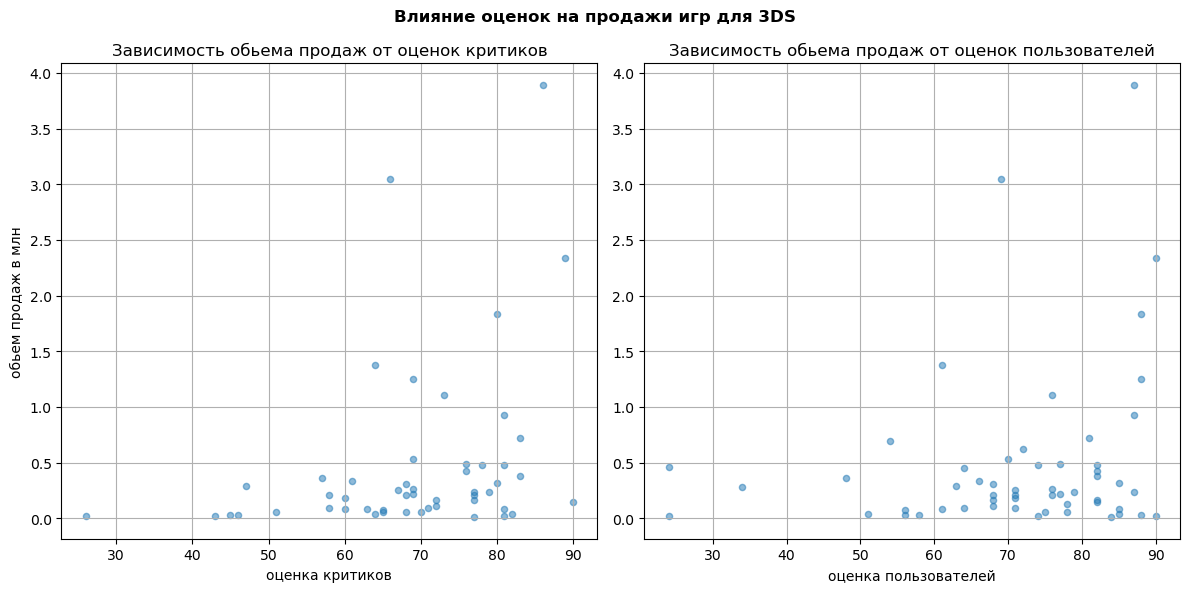

In [73]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

fig.suptitle('Влияние оценок на продажи игр для 3DS', fontweight='bold')
three_ds.plot(kind='scatter', x='critic_score', y='total_sales', grid=True, alpha=0.5, ax=ax1)
ax1.set_title('Зависимость обьема продаж от оценок критиков')
ax1.set_xlabel('оценка критиков')
ax1.set_ylabel('обьем продаж в млн')

three_ds.plot(kind='scatter', x='user_score', y='total_sales', grid=True, alpha=0.5, ax=ax2)
ax2.set_title('Зависимость обьема продаж от оценок пользователей')
ax2.set_xlabel('оценка пользователей')
ax2.set_ylabel('')

plt.tight_layout()
plt.show()

Из графиков видно, что сохраняется положительная корреляция между оценками критиков и обьемами продаж. Для `XOne`, как и для `PS4` корреляция совсем небольшая и почти незаметная. Для `3DS` же она уже положительная, хотя все еще не особо ощутимая (на уровне 0.21). Таким образом можно утверждать, что обьемы продаж напрямую зависят от оценок критиков. Чем выше игра будет оценена критиками, тем большим обьемом копий она скорее всего продасться

## 3.6 Продажи по жанрам

Посмотрим теперь на самые популярные жанры

In [76]:
data_grouped_genre = (data_new
 .pivot_table(index='genre', values='total_sales', aggfunc=['sum', 'count'])
 )

data_grouped_genre.columns = ['sum', 'count']

data_grouped_genre = (data_grouped_genre
                         .sort_values(by=['sum', 'count'],
                                      ascending=[True, True]))
data_grouped_genre

,sum,count
genre,,
Puzzle,2.21,14
Strategy,3.96,37
Simulation,13.13,44
Adventure,17.55,185
Platform,18.09,38
Racing,27.52,69
Fighting,28.22,60
Misc,37.55,113
Role-Playing,101.44,221


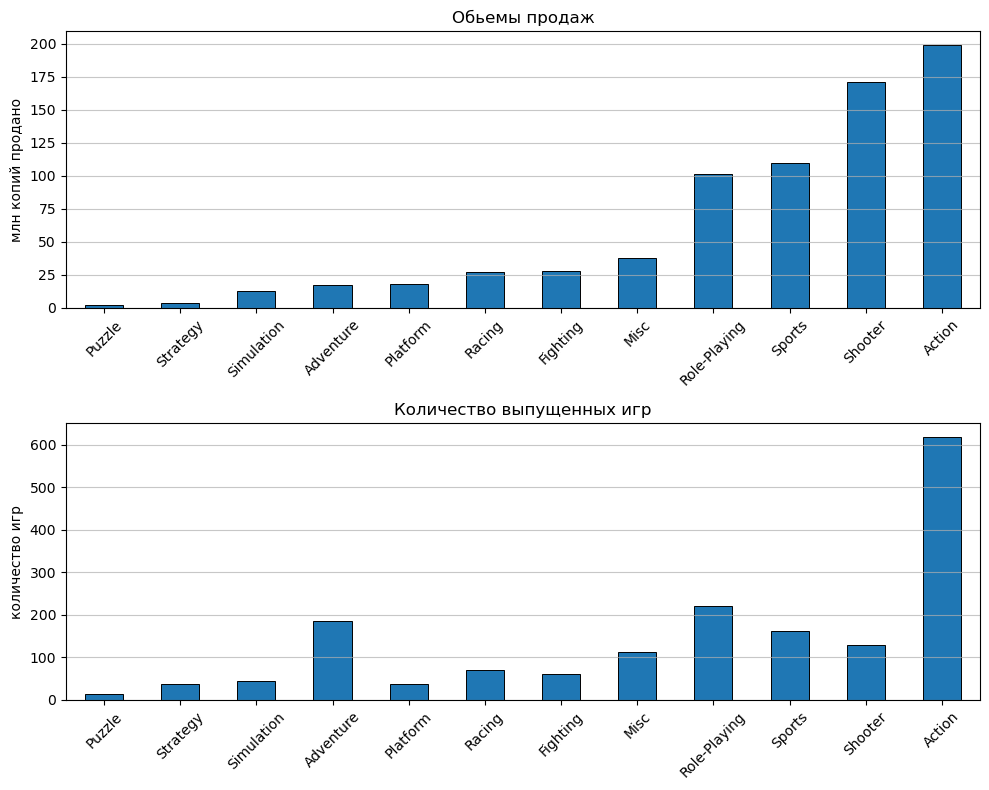

In [77]:
# создаем фигуры и две оси на которых буду распологаться графики
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# График для 'sum'
data_grouped_genre['sum'].plot(kind='bar', edgecolor='black', linewidth=0.7, ax=ax1)
ax1.set_title('Обьемы продаж')
ax1.set_ylabel('млн копий продано')
ax1.tick_params(axis='x', rotation=45)
ax1.set_xlabel('')
ax1.grid(axis='y', alpha=0.7)

# График для 'count'
data_grouped_genre['count'].plot(kind='bar', edgecolor='black', linewidth=0.7, ax=ax2)
ax2.set_title('Количество выпущенных игр')
ax2.set_ylabel('количество игр')
ax2.tick_params(axis='x', rotation=45)
ax2.set_xlabel('')
ax2.grid(axis='y', alpha=0.7)

# Отображение графиков
plt.tight_layout()
plt.show()

Из графика видим, что самый популярный по обьемам продаж и по количеству выпускаемых игр - жанр `Action` (около 200млн копий данного жанра и более 600 игр). Затем по обьемам продаж идут в порядке уменьшения жанры `Shooter`, `Sports`, `Role-playing` (обьемы продаж - 170, 110, 100 млн копий). Количество выпускаемых игр же наоборот идет в порядке увеличения по этим жанрам. Также стоит отметить (около 125, 170, 220 игр соответственно). отдельно стоит выделить категорию `Adventure`. Игр в данной категории выпускают много (3е место по всем жанрам),но продают в разы меньше копий, чем у той же 3йки сверху описанных игр

C:\Users\NikiTolLa\AppData\Local\Temp\ipykernel_8696\3647388726.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


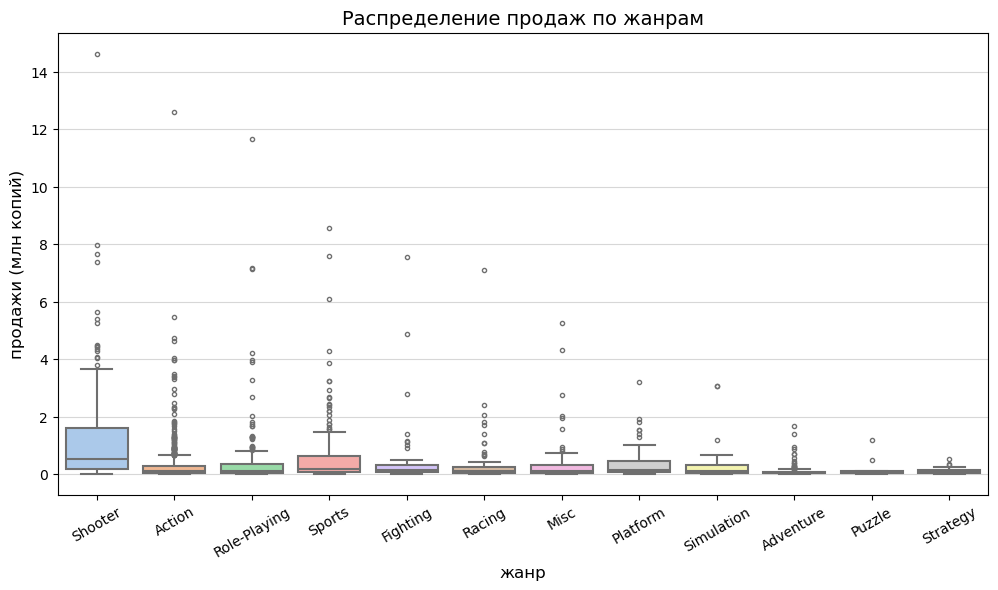

In [79]:
plt.figure(figsize=(12, 6))  # Размер фигуры
sns.boxplot(
    data=data_new,
    x='genre',
    y='total_sales',
    palette='pastel', # Цветовая схема
    order=data_new['genre'].unique(), # Порядок платформ
    linewidth=1.5,      # Толщина линий
    fliersize=3         # Размер выбросов
)

# Настройки оформления
plt.title('Распределение продаж по жанрам', fontsize=14, )
plt.xlabel('жанр', fontsize=12)
plt.ylabel('продажи (млн копий)', fontsize=12)
plt.xticks(rotation=30)  # Поворот подписей платформ
plt.grid(axis='y', alpha=0.5)
plt.show()

Уже на данном графике видно, что у многих популярных жанров, таких как `action` большинство продаж складывается из наиболее успешныз едичных игр. Уменьшим масштаб, чтобы получше разглядеть квантили.

C:\Users\NikiTolLa\AppData\Local\Temp\ipykernel_8696\1903953323.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


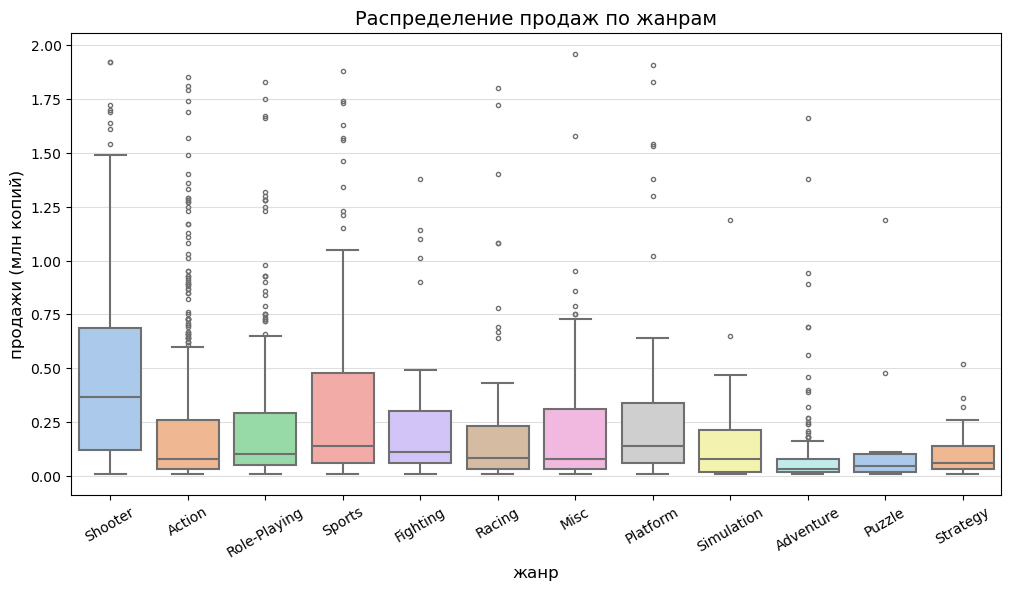

In [81]:
plt.figure(figsize=(12, 6))  # Размер фигуры
sns.boxplot(
    data=data_new[data_new['total_sales'] <= 2],
    x='genre',
    y='total_sales',
    palette='pastel', # Цветовая схема
    order=data_new['genre'].unique(), # Порядок платформ
    linewidth=1.5,      # Толщина линий
    fliersize=3         # Размер выбросов
)

# Настройки оформления
plt.title('Распределение продаж по жанрам', fontsize=14, )
plt.xlabel('жанр', fontsize=12)
plt.ylabel('продажи (млн копий)', fontsize=12)
plt.xticks(rotation=30)  # Поворот подписей платформ
plt.grid(axis='y', alpha=0.4)
plt.show()

После изменения масштаба картина весьма интересна. Видно, что гигантские обьемы продаж жанра `Action` складываются из выбросов или же единичных весьма успешных проектов. Наиболее стабильной в этом плане оказывается категория `Shooter`. У данной категории самый большой межквартильный рзмах, около 50% игр выпускаются тиражем до 0.375 млн копий, что больше чем третии квантили всех остальны категорий (кроме `Sports`). Также 75% игр в жанре `Shooter` продаются обьемами до 0.7 млн копий. В среднем же медиана по остальным категориям не превышает 0.125 млн копий (а для выше отдельно выделенной `Adventure` и вовсе медиана находится около нуля). Из всего этого можно заключить, что наибольший успех приносят едичные сверхуспешные проекты в каждой категори. Самой стабильной можно назвать, категорию `Shooter`

# 4. Составим портрет пользователя по регионам

опеределим для каждого региона ***топ 5*** наиболее популярных жанров, платформ. Также как влияет рейтинг ESRB на обьемы продаж по регионам. Малочисленные категории в жанрах и платформах обьеденим в категорию ***другие***. на рассмотении будут следующие регионы:
* Евпропейский (`eu_sales`)
* Североамереканский (`na_sales`)
* Японский (`jp_sales`)

In [84]:
# функция отображающая портрет покупателя по регионам по параметру
def graph (df, param, region, name, ax, other=True):


    sales = (data_new.pivot_table(index=param,
                                  values=region,
                                  aggfunc='sum')
                     .sort_values(by=region, ascending=False)
    )

    if other: # необходимо для того, чтобы выделять категори 'Other'
        # Выбираем топ-5 платформ
        top_5 = sales.head(5)

        # Суммируем продажи остальных платформ в "другие"
        others_sum = sales[region].iloc[5:].sum()
        others_row = pd.DataFrame({region: [others_sum]}, index=['Other'])

        # Объединяем топ-5 и "другие" в новую таблицу
        sales = pd.concat([top_5, others_row])

    sales.columns = ['sales']

    sales.plot(kind='pie',
               y="sales",
               autopct='%1.0f%%',
               wedgeprops={'linewidth': 1.5, 'edgecolor': 'white'},
               textprops={'size': 'x-large'},
               labels=sales.index,
               legend=False,
               title=f"Популярность в {name} ",
               ax=ax)

    ax.set(ylabel='')
    plt.tight_layout()

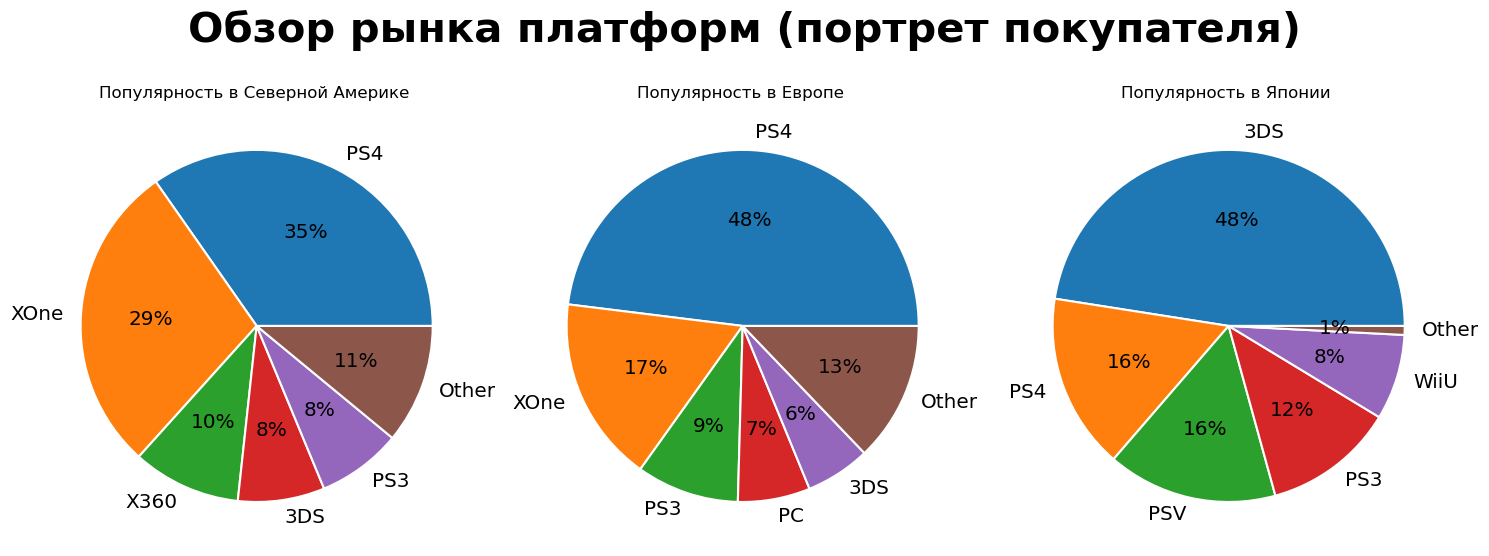

In [85]:
# круги в ряд
fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle('Обзор рынка платформ (портрет покупателя)', fontsize = 30, fontweight='bold')

graph(data_new, 'platform', 'na_sales', 'Северной Америке', axes[0])
graph(data_new, 'platform', 'eu_sales', 'Европе', axes[1])
graph(data_new, 'platform', 'jp_sales', 'Японии', axes[2])

Из круговых диаграмм видны отличия в потрете покупателя по платформам в зависимости от региона. Так наиболее популярные для Северной Америке и Евпропы платформы - `PS4`, `XOne`. В Северной Америке доля продаж 35% и 29% соответственно по платформам. В Евпропе 48 и 17 соотвественно. 3е место в этих двух регионах занимает категория `другие`. 11% для Северной Америке и 13% для Европы. Стоит также обратить внимание, что доли двух самых популярных платформ в Америке и Евпропе разнятся. Например в Евпропе пчоти в 3 раза больше продаж приходится на `PS4`, в то время как в Америке `PS4` обходит `XOne` всего на 6 процентных пунктов. Также относительно небольшую часть рынка, как американского так и евпропеского, занимает платформы `3DS` и `PS3`. В Европе отдельную часть рынка занимает `PC`, а в Америке `X360`.

Совершенно другая картина в японском регионе. 48% рынка здесь занимает `3DS`, что в 3 раза большой следующей по популярности платформы - `PS4`. в японском регионе, как в двух других часть рынка занимет `PS3`. Также в этом регионе представлены платформы `PSV` и `WiiU`, которые забирает на себя до 25% рынка и которые даже не представлены как отдельные категории в других регионах. Категория `Other` в разы меньше аналогичной категории в других регионах и составляет всего около 1 процента

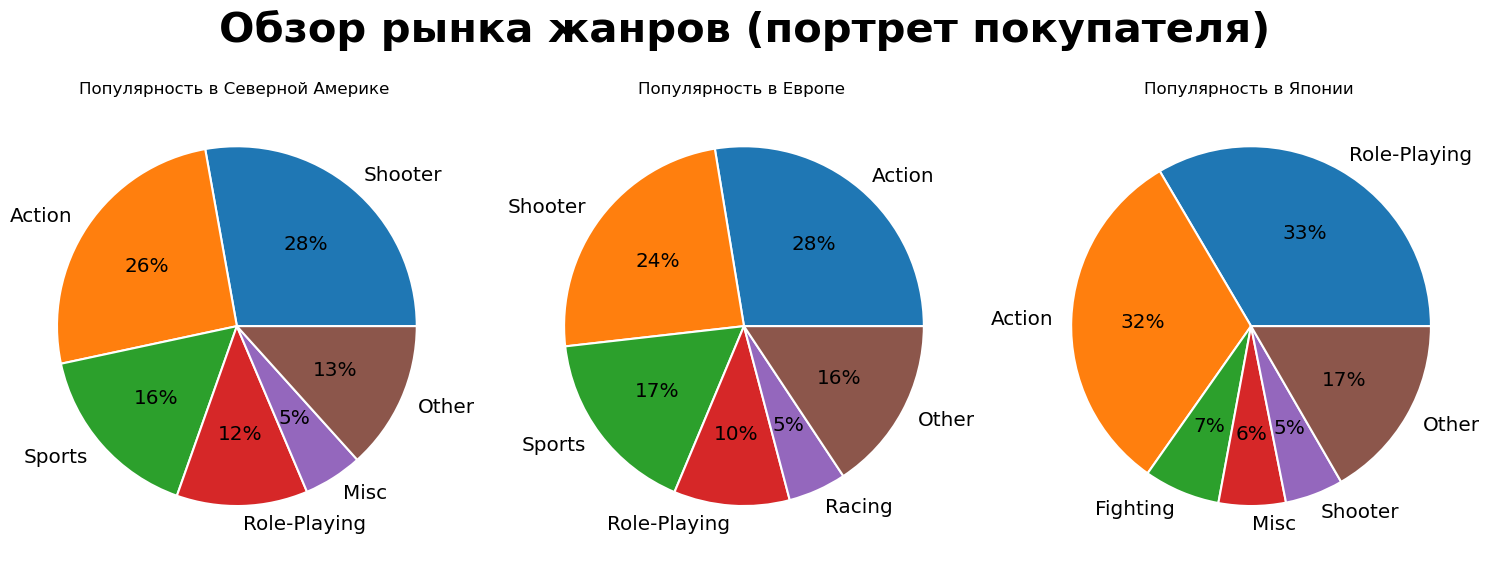

In [87]:
# круги в ряд
fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle('Обзор рынка жанров (портрет покупателя)', fontsize = 30, fontweight='bold')

graph(data_new, 'genre', 'na_sales', 'Северной Америке', axes[0])
graph(data_new, 'genre', 'eu_sales', 'Европе', axes[1])
graph(data_new, 'genre', 'jp_sales', 'Японии', axes[2])

Теперь перейдем к анализу жанров игр по регионам. Примерно одинаковая картина по рынку Америки и Евпропы, за исключением некоторых моментов. Самый популяный жанр в Америке - `Shooter` (28% рынка), а в евпрое - `Action` (также 28% рынка). Затем шутер становится вторым по популярности жанром в Евпропе, а экшн вторым а в Америке и занимают 24 и 26 процентов рынков соответственно. Далле, по попурности в Америке и Евпропе идут категории: `Sport`, `Other`, `Role-Play`. Отличие есть в последней категории: для Америки 5% рынка занимают игры жанра `Misc`, для Евпропы 5% рынка занимают гонки - `Racing`.

И снова ситуация совершенно другая в японском регионе. Там наибольшую прибыль приносят ролевые игры (до 33% всего рынка). 32% занимает уже известная категория - `Action`. А далее следующие категории: `Other` - 17% рынка, `Fighting` - 7%, `Misc` - 6%, `Shooter` - 5%. Интересно, что категория шутеров, которая является одной из основных категорий в Америке и Евпропе, занимает не такую большую часть рынка Японии. И ситуция ровно противположная с ролевыми играми.

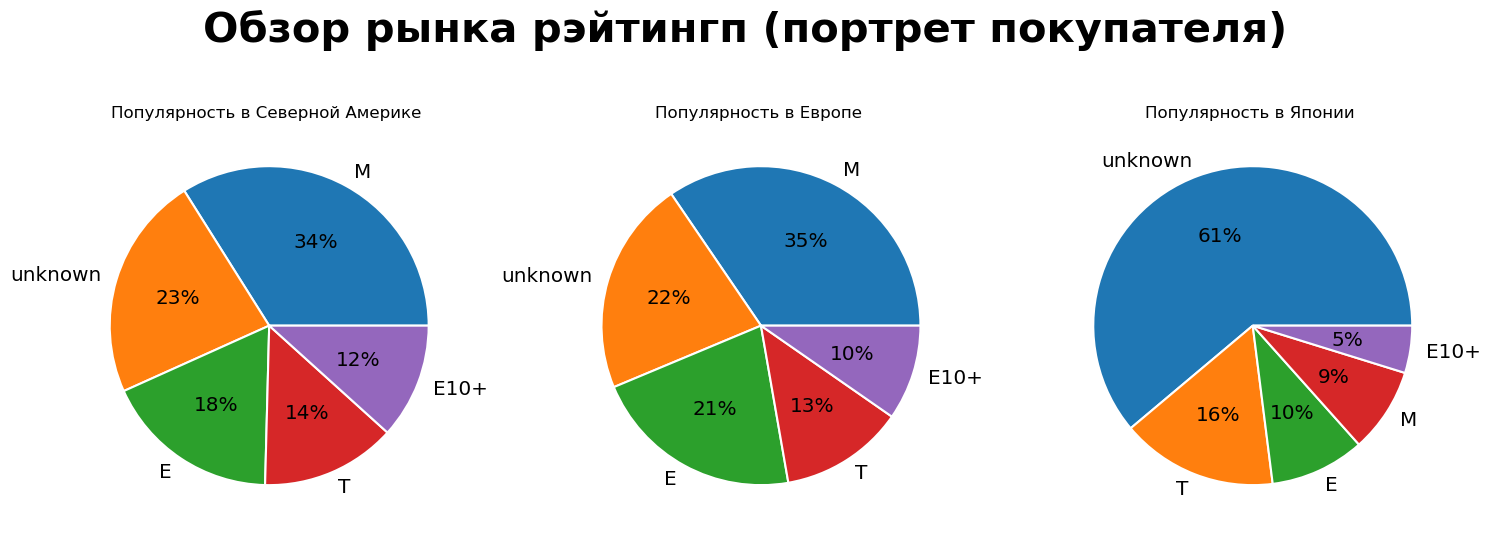

In [89]:
# круги в ряд
fig, axes = plt.subplots(1, 3, figsize = (15,6))
fig.suptitle('Обзор рынка рэйтингп (портрет покупателя)', fontsize = 30, fontweight='bold')

graph(data_new, 'rating', 'na_sales', 'Северной Америке', axes[0], other=False)
graph(data_new, 'rating', 'eu_sales', 'Европе', axes[1], other=False)
graph(data_new, 'rating', 'jp_sales', 'Японии', axes[2], other=False)

И опять, видим схожесть евпропейского и американского регионов. Что в Америке, что в продажи рапсределены по следующим рейтингам (от большего куска рынка к меньшему):
* игры для взрослых - категория `M` (34% Америка, 35% Европв)
* игры без категории - категория `unknown` (23% Америка, 22% Европв)
* игры для всех - категория `E` (18% Америка, 21% Европв)
* игры для подростков - категория `Т` (14% Америка, 13% Европв)
* игры для детей старше 10 лет - категория `E10+` (12% Америка, 10% Европв)

В японии же большую часть рынка занимают игры без рейтинга - 61%, далее игры для подростков - 16%, игры для всех - 10%, игры для взрослых - 9%, игры для детей 10+ - 5%

Видим опять большие отличия между японским регионом и двумя другими

###Общий выввод по регионам

по результатам анализа составлены портреты покупателй трех регионов: Североамереканского, Евпропейского и Японского по наиболее популярным платформам, жанрам игр и рэйтингу игр.

Можно сказать, что Европейский и Американский регионы весьма похожи. Для них похожи портреты покупателей по платформам и жанрам игр, а также почти точь в точь совпдают по рэйтингу игр.

Уникален в этом плане Японский регион. Для этого региона выделены по популярности отдельные платформы, не представленые в двух дургих регионах `3DS`, `WiiU`. Также в ходе составления портретов по жанрам и рэйтингам игр, было сформировано предположение, что в японии не сильно распросранены игры с насилием, относительно тех же американского и европеейского регионов. Об это свидетельствует то, что жанр шутер в японии занимает всего 5% рынка и является самым немногочисленным, в то время как в Евпропе и Америке этот жанр занимает 24 и 28 процентов всего рынка соответственно. Также в разрезе по рэйтингам игр, игры для взрослых в Японии составляют 9% всего рынка, когда в Европе и Аменрике 35 и 34 проценттов соответственно.

#5. Проверка гипотез

## 5.1 Проверим гипотезу о равенстве пользовательских рейтингов для `Xone` и `PC`

H0 - Средние пользовательские оценки для `XOne` и `PC` равны

H1 - Средние пользовательские оценки для `XOne` и `PC` различны

alpha = 0.05

In [94]:
data_xone = (data_new
             .loc[(data_new['platform'] == 'XOne')
                   & (data_new['user_score'].notna())
                   , 'user_score']
             .astype(int)
             .values)

data_pc = (data_new
           .loc[(data_new['platform'] == 'PC')
                 & (data_new['user_score'].notna())
                 , 'user_score']
           .astype(int)
           .values)

In [95]:
result_platforms = st.ttest_ind(data_xone, data_pc)
print(f'p-value = {result_platforms.pvalue}')

p-value = 0.10450507919348477


P-value составляет 0.104, что больше уровня статистической значимости alpha = 0.05. Следовательно данные не противоречат нулевой гипотезе на заданном уровне значимости, нулевую гипотезу нет оснований отвергнуть. Следовательно средние пользовательские оценки по этим двум платформам равны

## 5.2 Проверим гипотезу о равенстве пользовательских рейтингов для жанров `Action` и `Sports`

H0 - Средние пользовательские оценки для `Action` и `Sports` равны

H1 - Средние пользовательские оценки для `Action` и `Sports` различны

alpha = 0.05

In [98]:
data_action = (data_new
             .loc[(data_new['genre'] == 'Action')
                   & (data_new['user_score'].notna())
                   , 'user_score']
             .astype(int)
             .values)

data_sports = (data_new
           .loc[(data_new['genre'] == 'Sports')
                 & (data_new['user_score'].notna())
                 , 'user_score']
           .astype(int)
           .values)

In [99]:
result_platforms = st.ttest_ind(data_action, data_sports)
print(f'p-value = {result_platforms.pvalue}')

p-value = 2.871114798510669e-19


P-value на порядки меньше уровня статистической значимости alpha = 0.05. Следовательно данные противоречат нулевой гипотезе на заданном уровне значимости, есть основания отвергнуть нулевую гипотезу. Следовательно средние пользовательские оценки по этим двум жанрам НЕ равны

#6. Общие выводы по работе

В процессе анализа проведена предобработка данных с последующим их первичным анализом (EDA). В исходных данных были обработаны пропущенные значения, названия столбцов приведены к общему стилю.

История развития игровой индустри началась в далеко 1980 и шла в рост плоть до 2008-2009 года. Затем можно наблюдать спад по продажам вне зависимости от платформы. Данный феномен может быть связан с кризисом игровой индустрии в целом, а не с платформами по отдельности.

была построена визуализация жизни наиболее популярных платформ и вычислен средний срок жизни платформы (10.2 лет).

Также для анализа был выделен актуальный период с в 2014 по 2016 год, с помощью котоорого можно строить прогнозы на 2017 год.

За последниии 2 года получен рейтинг платформ с наибольшим количеством проданных копий по всему миру. Первая 5ка этого рейтинга следущая
* `PS4` - 290 млн копий
* `XOne` - 140 млн копий
* `3DS` - 88 млн копий
* `PS3` - 70 млн копий
* `X360` - 50 млн копий
Наиболее перспективные платформы - первые 3, так как `PS3` и `X360` являются предшественниками `PS4` и `XOne` соответственно и потихлньку уходят на второй план

Исходя из графиков диаграмм размаха стало ясно, что наибольшии прибыли приносят сверхуспешные единичные проекты для многих платформ

В ходе исследования взаимосвязи оценок критиков и обьемов продаж, была установлена положительная корреляция между этими величинами. При увеличении оценок критиков вероятнее всего будут расти и продажи игры. Для оценок пользователей и обьемов продаж линейной связи для 3х рассмотренных платформ не обнаружено

По жанрам картина следущая. Самые популярные по обьемам продаж:
* `Action` - 200 млн копий
* `Shooter` - 175 млн копий
* `Sports` - 115 млн копий
* `Role-Play` - 100 млн копий
Здесь интересно подметить, что хоть жанр экшн и является самым большим по обьемам продаж, болшинстов больших обьемов продаж идут за счет крупных индивидуальных проектов. В этом плане более стабилен жанр шутер, в котором меньше выбросов, а диапозон игр с широким тиражем гораздо больше, по сравнению с другими жанрами

Также интересно посмотреть на портрет потребителя в разбивке по регионам в категориях: жанр, платформа и рэйтинг игры. Выделены особенности отдельных регионов и их общие черты. Регионы Европы и Северной Америки можно назвать весьма похожими с общими тенденциями по платформам, жанрам и рэйтингам игр. Чего совершенно не скажешь о Японском регионе. Здесь выделены уникальые платформыЮ занимающие большую часть рынка. Оличаются доли наиболее популярных жанров и доли рейтингов игр. В ходе анализа выдвинуто преположение, что в японском регионе менгьше игр с насилием.

В конце проверены гипотезы на равенство средних двух незавсимых выборок с использованием т-теста. На основании полученного p-value мы не отвергли гипотезу о равенстве пользовательских оценок для платформ `X360` и `PC`. Но отвергли гипотезу о равенстве пользовательских оценок для жанров `Action` и `Sports`. оба теста проводились на уровне значимости alpha = 0.05